# Testing different optimizers: Adam

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
np.random.seed(1671)

In [13]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
RESHAPED = 784

In [16]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
X_train /= 255
X_test /= 255

In [18]:
print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' testing samples')

60000  training samples
10000  testing samples


In [19]:
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)

In [9]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [10]:
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
                    epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.5188 - acc: 0.8430 - val_loss: 0.1871 - val_acc: 0.9437
Epoch 2/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.2334 - acc: 0.9304 - val_loss: 0.1429 - val_acc: 0.9567
Epoch 3/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.1810 - acc: 0.9460 - val_loss: 0.1155 - val_acc: 0.9660
Epoch 4/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.1538 - acc: 0.9538 - val_loss: 0.1063 - val_acc: 0.9701
Epoch 5/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.1319 - acc: 0.9602 - val_loss: 0.0982 - val_acc: 0.9705
Epoch 6/20
48000/48000 [==============================] - 4s 80us/step - loss: 0.1195 - acc: 0.9636 - val_loss: 0.0895 - val_acc: 0.9736
Epoch 7/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.1068 - acc: 0.9669 - val_loss: 0.0893 - val_acc

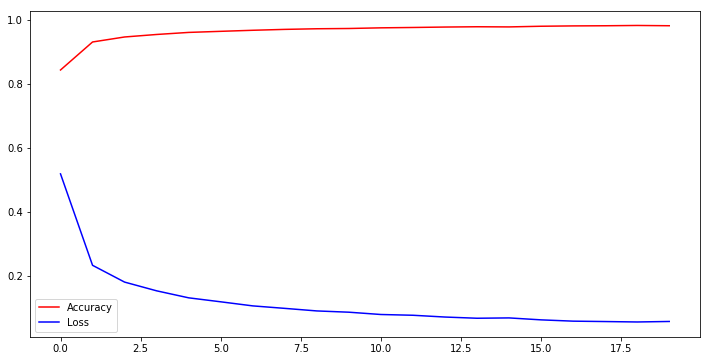

In [11]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'red', label = 'Accuracy' )
plt.plot(history.history['loss'], color = 'blue', label = 'Loss')
plt.legend()

In [12]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score {}'.format(score[0]))
print('Test accuracy {}'.format(score[1]))

10000/10000 [==============================] - 1s 80us/step
Test score 0.0786067095810111
Test accuracy 0.9798


## Ploting Loss and Accuracy for train and test

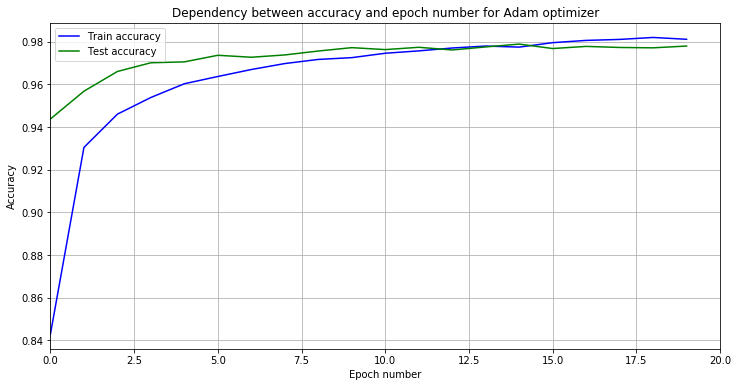

In [16]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'], color = 'blue', label = 'Train accuracy')
plt.plot(history.history['val_acc'], color = 'green', label = 'Test accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xlim(0,20)
plt.title('Dependency between accuracy and epoch number for Adam optimizer')
plt.grid()
plt.legend()

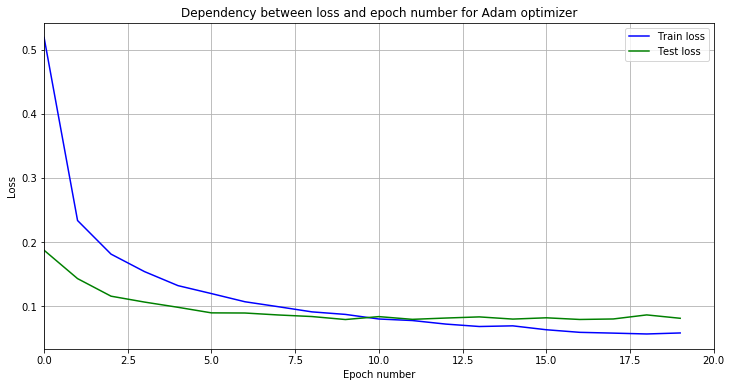

In [17]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], color = 'blue', label = 'Train loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Test loss')
plt.xlabel('Epoch number')
plt.xlim(0,20)
plt.ylabel('Loss')
plt.title('Dependency between loss and epoch number for Adam optimizer')
plt.grid()
plt.legend()

# Visualization

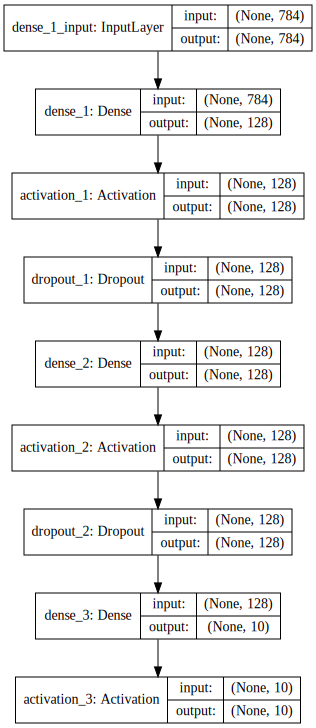

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

# Dependency between dropout rate and final score

In [32]:
dropouts = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
# 0. < self.rate < 1.

In [33]:
loss, accuracy = list(), list()
for DROPOUT in dropouts:
    print('Dropout rate {}'.format(str(DROPOUT)))
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(rate=DROPOUT))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dropout(rate=DROPOUT))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, 
                        batch_size=BATCH_SIZE,epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
    score = model.evaluate(X_test, y_test, verbose=VERBOSE)
    print('Test score {}'.format(score[0]))
    print('Test accuracy {}'.format(score[1]))
    print('\n')
    loss.append(score[0])
    accuracy.append(score[1])

Dropout rate 0.01
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 140us/step - loss: 0.2396 - acc: 0.9268 - val_loss: 0.1226 - val_acc: 0.9623
Epoch 2/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.0964 - acc: 0.9705 - val_loss: 0.1000 - val_acc: 0.9682
Epoch 3/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.0690 - acc: 0.9796 - val_loss: 0.0969 - val_acc: 0.9707
Epoch 4/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.0498 - acc: 0.9842 - val_loss: 0.0897 - val_acc: 0.9733
Epoch 5/20
48000/48000 [==============================] - 4s 87us/step - loss: 0.0387 - acc: 0.9879 - val_loss: 0.0874 - val_acc: 0.9740
Epoch 6/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.0302 - acc: 0.9910 - val_loss: 0.0920 - val_acc: 0.9728
Epoch 7/20
48000/48000 [==============================] - 4s 87us/step - loss: 0.0231 - acc: 0.9927 - val_lo

48000/48000 [==============================] - 5s 96us/step - loss: 0.0368 - acc: 0.9876 - val_loss: 0.0834 - val_acc: 0.9781
Epoch 18/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.0356 - acc: 0.9884 - val_loss: 0.0840 - val_acc: 0.9790
Epoch 19/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.0342 - acc: 0.9883 - val_loss: 0.0843 - val_acc: 0.9786
Epoch 20/20
10000/10000 [==============================] - 1s 75us/step
Test score 0.09143365745045376
Test accuracy 0.9784


Dropout rate 0.3
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 127us/step - loss: 0.3474 - acc: 0.8930 - val_loss: 0.1406 - val_acc: 0.9592
Epoch 2/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.1893 - acc: 0.9442 - val_loss: 0.1221 - val_acc: 0.9640
Epoch 3/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.1548 - acc: 0.9536 - val_loss: 0.1056 - val_acc: 

48000/48000 [==============================] - 4s 89us/step - loss: 0.1575 - acc: 0.9539 - val_loss: 0.0985 - val_acc: 0.9730
Epoch 13/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.1525 - acc: 0.9547 - val_loss: 0.0977 - val_acc: 0.9729
Epoch 14/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.1441 - acc: 0.9560 - val_loss: 0.1024 - val_acc: 0.9727
Epoch 15/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.1430 - acc: 0.9585 - val_loss: 0.0988 - val_acc: 0.9723
Epoch 16/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.1407 - acc: 0.9577 - val_loss: 0.0969 - val_acc: 0.9738
Epoch 17/20
48000/48000 [==============================] - 4s 87us/step - loss: 0.1394 - acc: 0.9589 - val_loss: 0.0957 - val_acc: 0.9752
Epoch 18/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.1341 - acc: 0.9603 - val_loss: 0.0998 - val_acc: 0.9735
Epoch 19/20
48000/48000 [=====================

48000/48000 [==============================] - 5s 96us/step - loss: 1.1867 - acc: 0.5611 - val_loss: 0.6646 - val_acc: 0.8812
Epoch 8/20
48000/48000 [==============================] - 5s 100us/step - loss: 1.1612 - acc: 0.5685 - val_loss: 0.6360 - val_acc: 0.8879
Epoch 9/20
48000/48000 [==============================] - 6s 120us/step - loss: 1.1455 - acc: 0.5782 - val_loss: 0.6012 - val_acc: 0.8925
Epoch 10/20
48000/48000 [==============================] - 5s 103us/step - loss: 1.1117 - acc: 0.5913 - val_loss: 0.5930 - val_acc: 0.8893
Epoch 11/20
48000/48000 [==============================] - 4s 93us/step - loss: 1.1004 - acc: 0.5985 - val_loss: 0.5872 - val_acc: 0.8938
Epoch 12/20
48000/48000 [==============================] - 5s 99us/step - loss: 1.0859 - acc: 0.6003 - val_loss: 0.5770 - val_acc: 0.8926
Epoch 13/20
48000/48000 [==============================] - 5s 96us/step - loss: 1.0832 - acc: 0.6030 - val_loss: 0.5472 - val_acc: 0.8922
Epoch 14/20
48000/48000 [====================

In [34]:
dropout_rate = np.array(dropouts)
loss, accuracy = np.array(loss), np.array(accuracy)

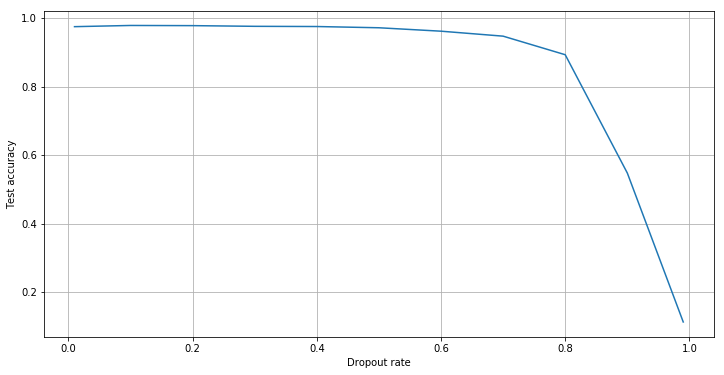

In [37]:
plt.figure(figsize=(12,6))
plt.xlabel('Dropout rate')

plt.ylabel('Test accuracy')

plt.grid()
plt.plot(dropout_rate, accuracy)

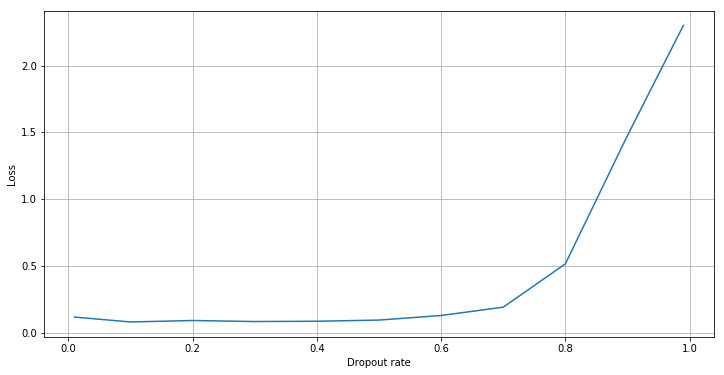

In [40]:
plt.figure(figsize=(12,6))
plt.xlabel('Dropout rate')

plt.ylabel('Loss')
plt.grid()
plt.plot(dropout_rate, loss)

# Learning rate of Adam optimizer

In [41]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
DROPOUT = 0.2
loss, accuracy = list(), list()
for lr in learning_rates:
    print('Learning rate {}'.format(str(lr)))
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape = (RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(rate=DROPOUT))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dropout(rate=DROPOUT))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.compile(optimizer=Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, 
                        batch_size=BATCH_SIZE,epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
    score = model.evaluate(X_test, y_test, verbose=VERBOSE)
    print('Test score {}'.format(score[0]))
    print('Test accuracy {}'.format(score[1]))
    print('\n')
    loss.append(score[0])
    accuracy.append(score[1])

Learning rate 0.1
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 149us/step - loss: 14.4872 - acc: 0.0991 - val_loss: 14.5117 - val_acc: 0.0997
Epoch 2/20
48000/48000 [==============================] - 5s 94us/step - loss: 14.5180 - acc: 0.0993 - val_loss: 14.5117 - val_acc: 0.0997
Epoch 3/20
48000/48000 [==============================] - 5s 105us/step - loss: 14.5184 - acc: 0.0992 - val_loss: 14.5117 - val_acc: 0.0997
Epoch 4/20
48000/48000 [==============================] - 5s 99us/step - loss: 14.3901 - acc: 0.1072 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 5/20
48000/48000 [==============================] - 5s 111us/step - loss: 14.2813 - acc: 0.1140 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 6/20
48000/48000 [==============================] - 5s 101us/step - loss: 14.2813 - acc: 0.1140 - val_loss: 14.4096 - val_acc: 0.1060
Epoch 7/20
48000/48000 [==============================] - 5s 105us/step - loss: 14.2813 - acc:

Epoch 17/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.0394 - acc: 0.9868 - val_loss: 0.0753 - val_acc: 0.9792
Epoch 18/20
48000/48000 [==============================] - 5s 95us/step - loss: 0.0352 - acc: 0.9882 - val_loss: 0.0828 - val_acc: 0.9781
Epoch 19/20
48000/48000 [==============================] - 5s 97us/step - loss: 0.0346 - acc: 0.9885 - val_loss: 0.0858 - val_acc: 0.9773
Epoch 20/20
10000/10000 [==============================] - 1s 143us/step
Test score 0.07448416683726937
Test accuracy 0.9797


Learning rate 0.0001
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 157us/step - loss: 1.2485 - acc: 0.6259 - val_loss: 0.4818 - val_acc: 0.8816
Epoch 2/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.5201 - acc: 0.8476 - val_loss: 0.3198 - val_acc: 0.9120
Epoch 3/20
48000/48000 [==============================] - 5s 102us/step - loss: 0.3982 - acc: 0.8841 - val_loss:

In [42]:
learning_rates = np.array(learning_rates)
loss, accuracy = np.array(loss), np.array(accuracy)

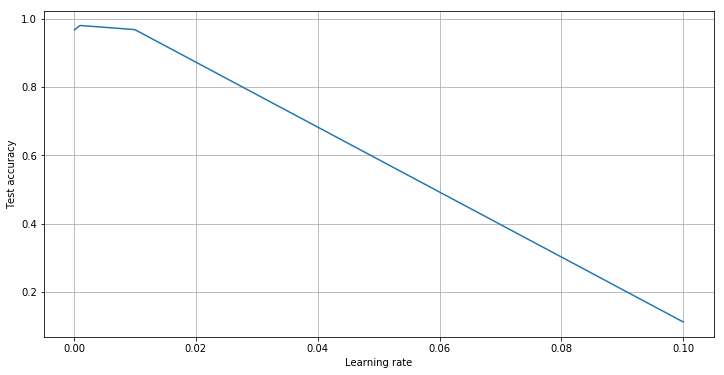

In [43]:
plt.figure(figsize=(12,6))
plt.xlabel('Learning rate')

plt.ylabel('Test accuracy')

plt.grid()
plt.plot(learning_rates, accuracy)

In [69]:
y_pred_proba = model.predict_proba(X_test)

In [70]:
y_pred_proba[0]

array([1.9883703e-06, 1.6656495e-06, 3.0048675e-04, 2.0573678e-04,
       5.5151286e-08, 8.7867320e-06, 2.3392634e-09, 9.9946851e-01,
       8.4496702e-07, 1.1942857e-05], dtype=float32)

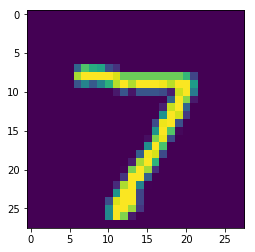

In [71]:
plt.imshow(np.reshape(X_test[0], (28,28)))

In [72]:
a = (y_pred_proba[0] > 0.5).astype(int)

In [73]:
a

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred[0]

array([1.9883703e-06, 1.6656495e-06, 3.0048675e-04, 2.0573678e-04,
       5.5151286e-08, 8.7867320e-06, 2.3392634e-09, 9.9946851e-01,
       8.4496702e-07, 1.1942857e-05], dtype=float32)

In [ ]:
y